## Clean Text

In [193]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv

--2022-04-05 15:48:53--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.162
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3501243 (3.3M) [text/csv]
Saving to: ‘text_2_clean.csv.5’

text_2_clean.csv.5  100%[===================>]   3.34M  5.26MB/s    in 0.6s    

2022-04-05 15:48:54 (5.26 MB/s) - ‘text_2_clean.csv.5’ saved [3501243/3501243]



In [194]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [195]:
df = pd.read_csv('text_2_clean.csv') 
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [196]:
df['text'].to_list()

[' I`d have responded, if I were going',
 ' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
 '2am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 ' Both of you',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 ' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'test test from the LG enV2',
 'Uh oh, I am sunburned',
 ' S`ok, trying to plot alternatives as we speak *sigh*',
 'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on i

In [197]:
df['text'].isnull().sum()

1

In [198]:
#Cleaning the text using Regular Expressions
import re

df["text"] = df["text"].fillna('').apply(str)
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(lambda x: re.sub('http\S+','',x))
df["text"] = df["text"].apply(lambda x: re.sub('\w*\d\w*"','',x))
df["text"] = df["text"].apply(lambda x: re.sub('[.,!?:;-=...@#_]','',x))
df["text"] = df["text"].str.replace('[^\w\s]','')
df["text"] = df["text"].str.replace('\d+', '')
df["text"] = df["text"].str.replace(' +',' ')

In [199]:
lista_text = df["text"].to_list()

In [200]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
list1= list(stopwords.words('english'))
list1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27481 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [203]:
list2= ['soooooo sleeeeepy']
list3= list1+list2

df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (list3)]))

df["text"].to_list()

['id responded going',
 'sooo sad miss san diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnt put releases already bought',
 'shameless plugging best rangers forum earth',
 'feedings baby fun smiles coos',
 'soooo high',
 '',
 'journey wow u became cooler hehe possible',
 'much love hopeful reckon chances minimal p im never gonna get cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight lost voice',
 'test test lg env',
 'uh oh sunburned',
 'sok trying plot alternatives speak sigh',
 'ive sick past days thus hair looks wierd didnt hat would look',
 'back home gonna miss every one',
 'hes',
 'oh marly im sorry hope find soon',
 'playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet',
 'cleaning house family comming later today',
 'gotta restart computer thought win supposed put end constant rebootiness',
 'see wat mean bout follw friidays called los

In [204]:
#Removing un common words
#pulizia delle frequenze (rimuovo le parole poco frequenti in modo da avere meno valori di frwquenze più rilevanti)

freq=pd.Series(' '.join(df["text"]).split()).value_counts()[-3000:]

df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if x not in freq))
df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if len(x) < 12))
df["text"] = df["text"].apply(lambda x:" ".join(x for x in x.split() if len(x) > 3))
df["text"].to_list()

['going',
 'sooo miss diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnt releases already bought',
 'shameless plugging best rangers forum earth',
 'feedings baby smiles coos',
 'soooo high',
 '',
 'journey became cooler hehe possible',
 'much love hopeful reckon chances minimal never gonna cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously',
 'want music tonight lost voice',
 'test test',
 'sunburned',
 'trying plot speak sigh',
 'sick past days thus hair looks wierd didnt would look',
 'back home gonna miss every',
 '',
 'marly sorry hope find soon',
 'playing ghost online really interesting updates kirin metamorph third cant wait dragon',
 'cleaning house family comming later today',
 'gotta restart computer thought supposed constant rebootiness',
 'mean bout follw friidays called lose fllowers friday',
 'free fillin ipod addicted',
 'sorry',
 'malaysiano internet access twit',
 'juss came backk berkeleyy madd havent minute

In [205]:
#elimina i testi con sentiment analysis neutrale dal dataframe

df = df[df['sentiment'].str.contains('neutral')==False]
df

,textID,text,selected_text,sentiment
1,549e992a42,sooo miss diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,interview leave alone,leave me alone,negative
4,358bd9e861,sons couldnt releases already bought,"Sons of ****,",negative
6,6e0c6d75b1,feedings baby smiles coos,fun,positive
...,...,...,...,...
27475,b78ec00df5,enjoy night,enjoy,positive
27476,4eac33d1c0,wish could come denver husband lost cant afford,d lost,negative
27477,4f4c4fc327,wondered rake client made clear dont force dev...,", don`t force",negative
27478,f67aae2310,good enjoy break probably need hectic weekend ...,Yay good for both of you.,positive


In [206]:
#sostituisce la sentiment negativa con 0 e la pisitiva con 1

df['sentiment'] = df['sentiment'].replace({'negative': 0, 'positive': 1})
df

,textID,text,selected_text,sentiment
1,549e992a42,sooo miss diego,Sooo SAD,0
2,088c60f138,boss bullying,bullying me,0
3,9642c003ef,interview leave alone,leave me alone,0
4,358bd9e861,sons couldnt releases already bought,"Sons of ****,",0
6,6e0c6d75b1,feedings baby smiles coos,fun,1
...,...,...,...,...
27475,b78ec00df5,enjoy night,enjoy,1
27476,4eac33d1c0,wish could come denver husband lost cant afford,d lost,0
27477,4f4c4fc327,wondered rake client made clear dont force dev...,", don`t force",0
27478,f67aae2310,good enjoy break probably need hectic weekend ...,Yay good for both of you.,1


In [207]:
df['text']

1                                          sooo miss diego
2                                            boss bullying
3                                    interview leave alone
4                     sons couldnt releases already bought
6                                feedings baby smiles coos
                               ...                        
27475                                          enjoy night
27476      wish could come denver husband lost cant afford
27477    wondered rake client made clear dont force dev...
27478    good enjoy break probably need hectic weekend ...
27479                                                worth
Name: text, Length: 16363, dtype: object

In [208]:
#Importo da NLTK punteggiatura e wordnet per la lemmatizzazione

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [209]:
#Lemmatizzazione

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

df['text'].apply(lambda document: ' '.join([lemma.lemmatize(word) for word in nltk.word_tokenize(document)]))

1                                          sooo miss diego
2                                             bos bullying
3                                    interview leave alone
4                       son couldnt release already bought
6                                   feeding baby smile coo
                               ...                        
27475                                          enjoy night
27476      wish could come denver husband lost cant afford
27477    wondered rake client made clear dont force dev...
27478    good enjoy break probably need hectic weekend ...
27479                                                worth
Name: text, Length: 16363, dtype: object

## Word Cloud

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16363 entries, 1 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         16363 non-null  object
 1   text           16363 non-null  object
 2   selected_text  16363 non-null  object
 3   sentiment      16363 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 639.2+ KB


In [211]:
lista_text = df['text'].tolist()

(-0.5, 799.5, 399.5, -0.5)

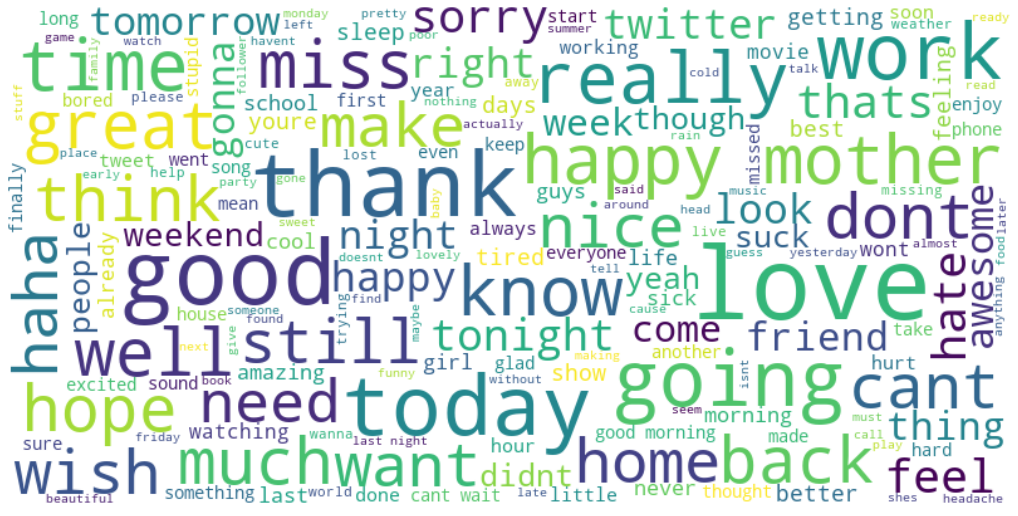

In [212]:
#from nltk import text
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(' '.join(lista_text))

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

## Bag of Words

In [213]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, 
                             stop_words=stopwords.words('english'))
X_ = vectorizer.fit_transform(df['text']).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Fit con TF IDF

In [214]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()

In [215]:
y = df['sentiment']

In [216]:
y.dtypes

dtype('int64')

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

# Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

>1, train: 0.530, test: 0.513
>2, train: 0.563, test: 0.549
>3, train: 0.606, test: 0.579
>4, train: 0.639, test: 0.611
>5, train: 0.680, test: 0.648
>6, train: 0.709, test: 0.672
>7, train: 0.738, test: 0.702
>8, train: 0.759, test: 0.715
>9, train: 0.774, test: 0.726
>10, train: 0.785, test: 0.739
>11, train: 0.796, test: 0.753
>12, train: 0.819, test: 0.773
>13, train: 0.840, test: 0.808
>14, train: 0.836, test: 0.807
>15, train: 0.833, test: 0.809
>16, train: 0.831, test: 0.807
>17, train: 0.831, test: 0.806
>18, train: 0.833, test: 0.808
>19, train: 0.832, test: 0.806
>20, train: 0.834, test: 0.806


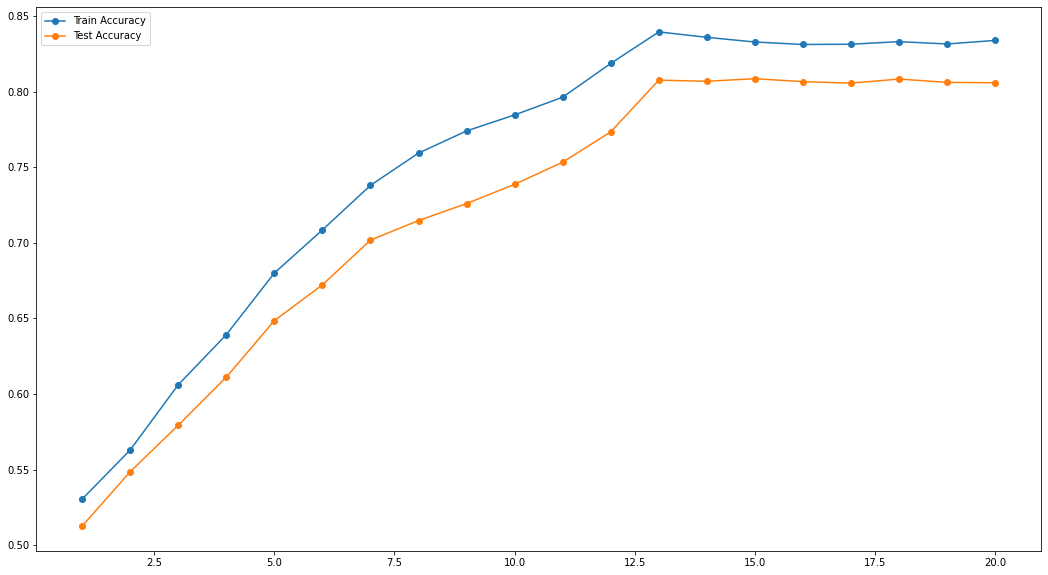

In [219]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=200,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

#MultiNomial Naive Bayes

In [220]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [221]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8235150329992666


Cofusion Matrix

In [222]:
labels = ['Negative', 'Positive']

Text(69.0, 0.5, 'Actual')

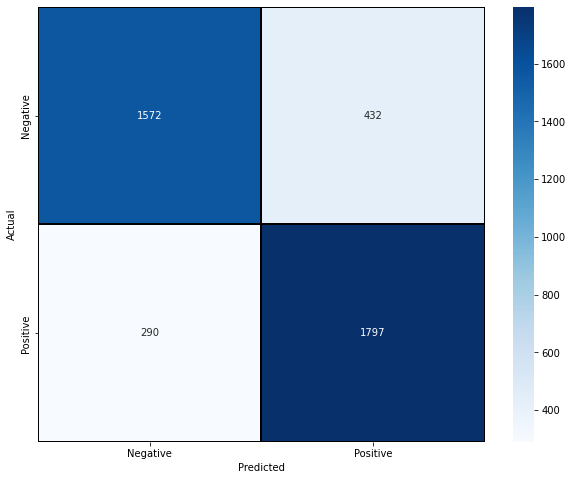

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

Classification Report

In [224]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.84      0.78      0.81      2004
    Positive       0.81      0.86      0.83      2087

    accuracy                           0.82      4091
   macro avg       0.83      0.82      0.82      4091
weighted avg       0.82      0.82      0.82      4091



ROC Curve

In [225]:
!pip install plot-metric --quiet

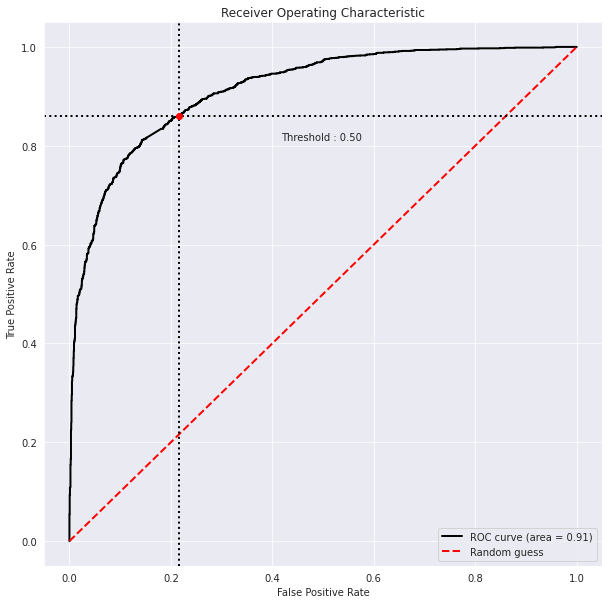

In [226]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

## SGD Classifier

In [227]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.823026154974334


In [228]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.77      0.90      0.83      2004
    Positive       0.89      0.75      0.81      2087

    accuracy                           0.82      4091
   macro avg       0.83      0.82      0.82      4091
weighted avg       0.83      0.82      0.82      4091



Text(69.0, 0.5, 'Actual')

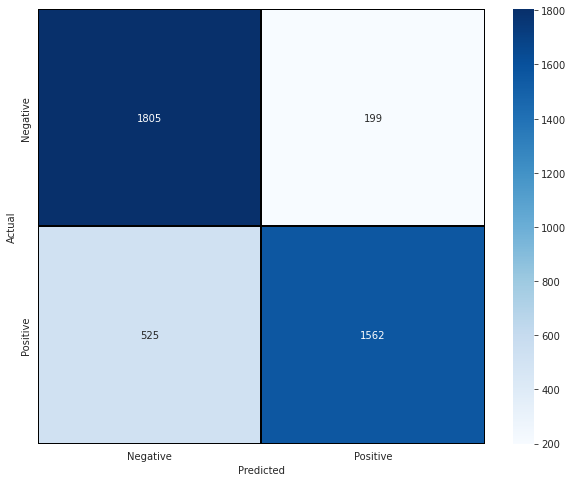

In [229]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

ROC Curve

In [233]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

AttributeError: ignored

## Pipeline

In [230]:
import numpy as np

X_array = np.array(df['text']) # Cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_array, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [231]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))
tfidf = TfidfTransformer()
clf = MultinomialNB()


pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

In [232]:
import joblib

joblib.dump(pipe,'pipeline_classifier_Clean_re.pkl')

['pipeline_classifier_Clean_re.pkl']